In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
df.head()

df["Reviews"].str.isnumeric().sum()
df[~df["Reviews"].str.isnumeric()]

df_copy = df.copy()
df_copy=df_copy.drop(df_copy.index[10472])
df_copy[~df_copy["Reviews"].str.isnumeric()]

df_copy["Reviews"]=df_copy["Reviews"].astype("int")

df_copy["Size"]=df_copy["Size"].str.replace("M","000")
df_copy["Size"]=df_copy["Size"].str.replace("k","")
df_copy["Size"]=df_copy["Size"].replace("Varies with device",np.nan)
df_copy["Size"]=df_copy["Size"].astype(float)

chars_to_remove = ["+",",","$"]
cols_to_clean = ["Installs","Price"]
for item in chars_to_remove:
    for cols in cols_to_clean:
        df_copy[cols]=df_copy[cols].str.replace(item,"")

        
df_copy["Installs"]=df_copy["Installs"].astype("int")
df_copy["Price"]=df_copy["Price"].astype(float)

df_copy["Last Updated"]=pd.to_datetime(df_copy["Last Updated"])
df_copy["Day"]=df_copy["Last Updated"].dt.day
df_copy["Month"]=df_copy["Last Updated"].dt.month
df_copy["Year"]=df_copy["Last Updated"].dt.year



#### Price Distribution:
- Visualize the distribution of app prices.

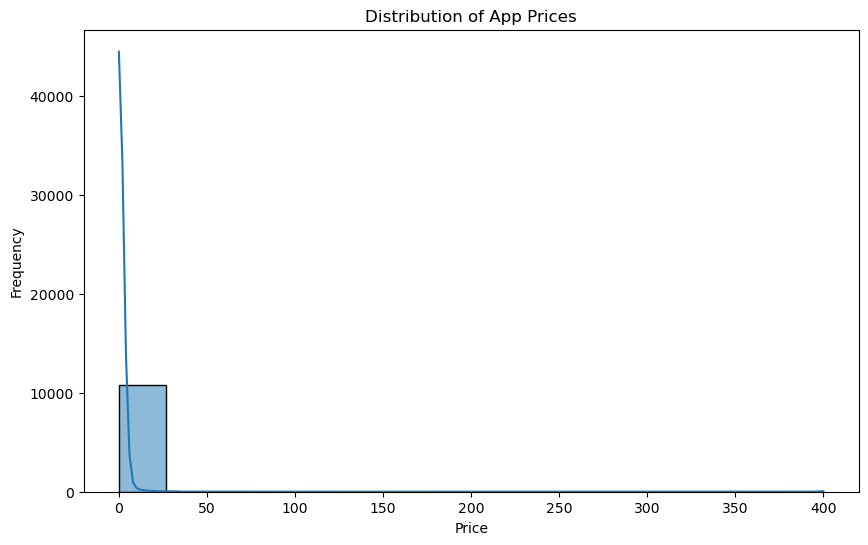

In [2]:
plt.figure(figsize=(10, 6))
sns.histplot(df_copy['Price'], kde=True)
plt.title('Distribution of App Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


#### Popular Categories by Average Rating:
- Identify the app categories with the highest average ratings.

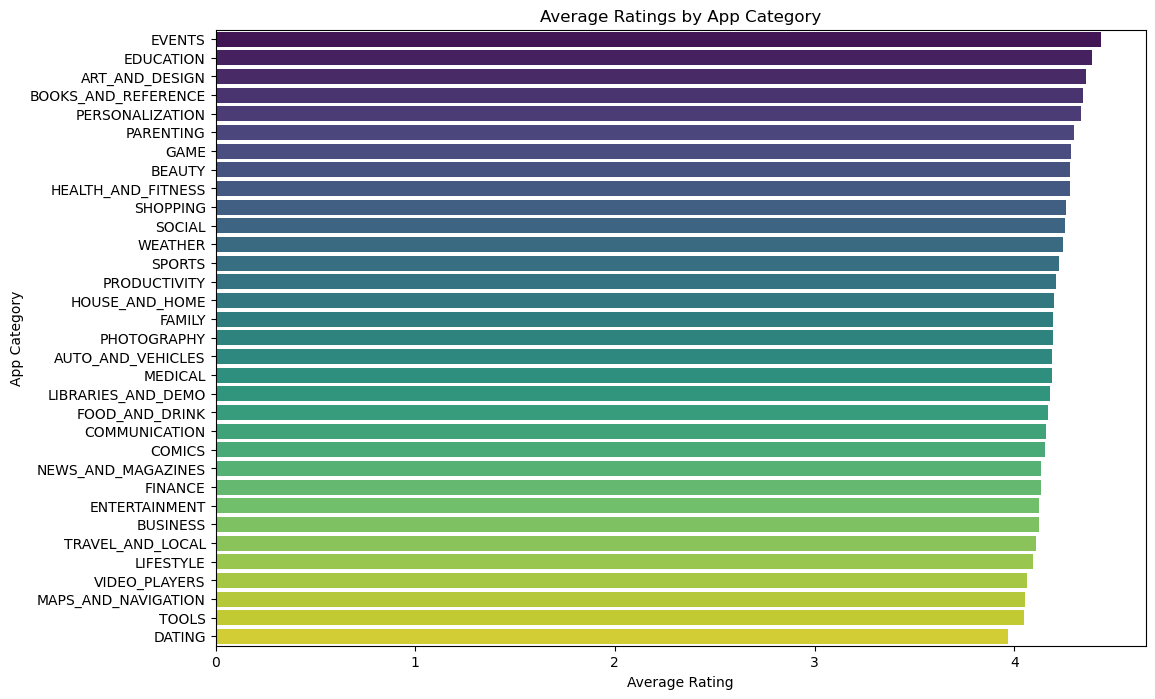

In [3]:
avg_ratings_by_category = df_copy.groupby('Category')['Rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(y=avg_ratings_by_category.index, x=avg_ratings_by_category.values, palette='viridis')
plt.title('Average Ratings by App Category')
plt.xlabel('Average Rating')
plt.ylabel('App Category')
plt.show()


#### App Categories vs. Number of Reviews:
- Analyze which app categories tend to have more reviews.

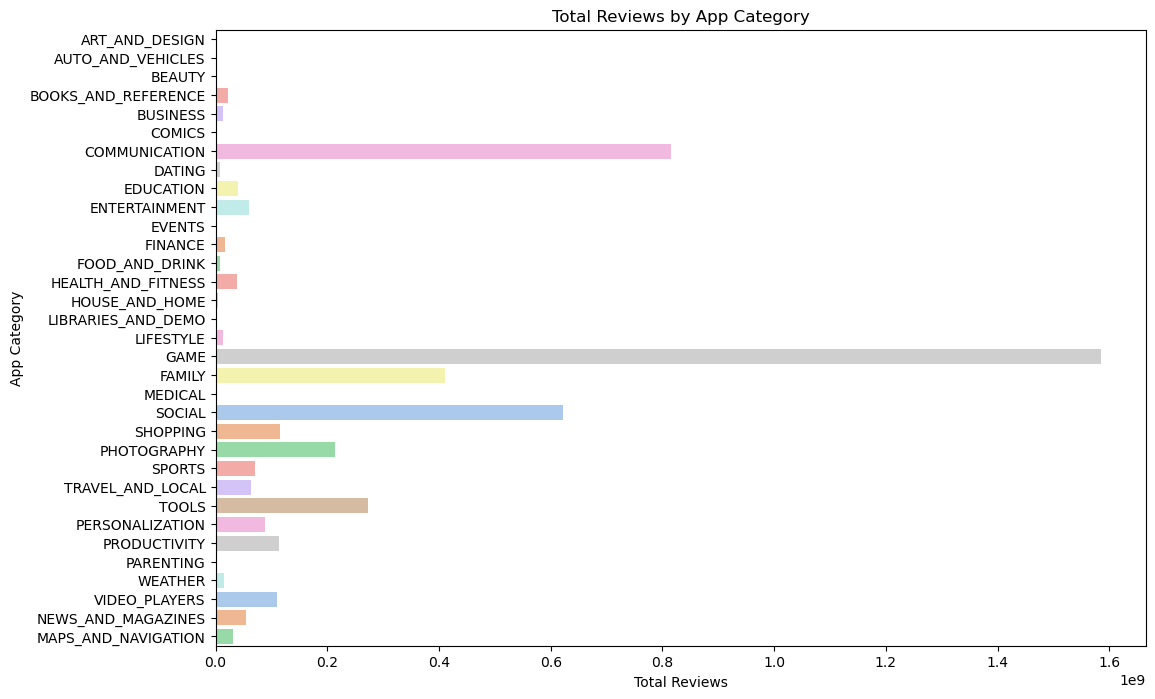

In [4]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Reviews', y='Category', data=df_copy, estimator=np.sum, ci=None, palette='pastel')
plt.title('Total Reviews by App Category')
plt.xlabel('Total Reviews')
plt.ylabel('App Category')
plt.show()


#### Distribution of Free vs. Paid Apps:
- Visualize the proportion of free and paid apps.

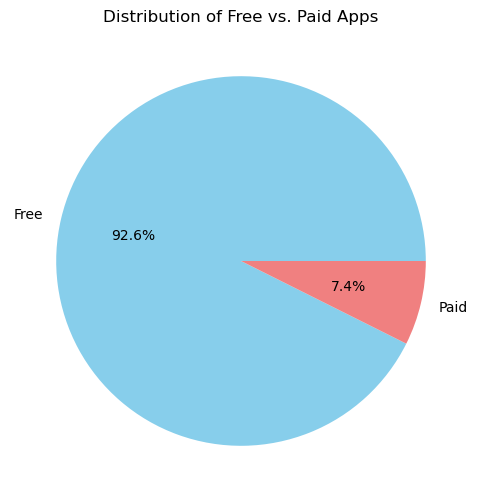

In [5]:
plt.figure(figsize=(8, 6))
df_copy['Type'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Free vs. Paid Apps')
plt.ylabel('')
plt.show()


#### Monthly App Releases Over the Years:
- Examine the trend of monthly app releases over the years.

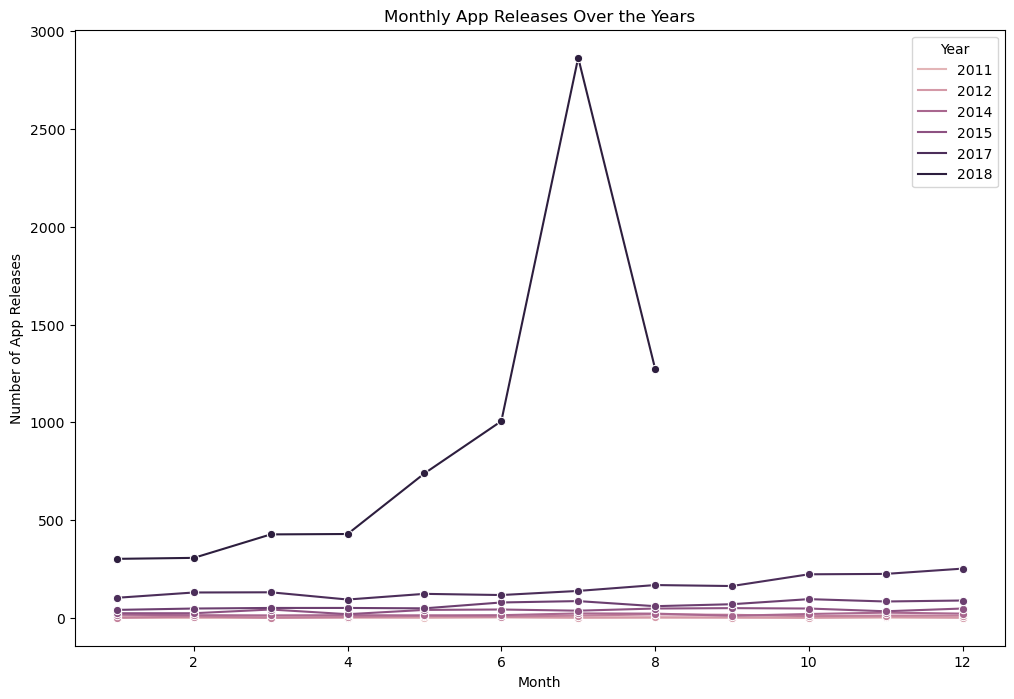

In [6]:
monthly_release_counts = df_copy.groupby(['Year', 'Month']).size().reset_index(name='Counts')
plt.figure(figsize=(12, 8))
sns.lineplot(x='Month', y='Counts', hue='Year', data=monthly_release_counts, marker='o')
plt.title('Monthly App Releases Over the Years')
plt.xlabel('Month')
plt.ylabel('Number of App Releases')
plt.legend(title='Year')
plt.show()



### Q16. A mobile app development company wants to analyze the Google Playstore dataset to identify the most successful app developers. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?


#### App Categories vs. Installs:
- Identify the most popular app categories based on the total number of installs.

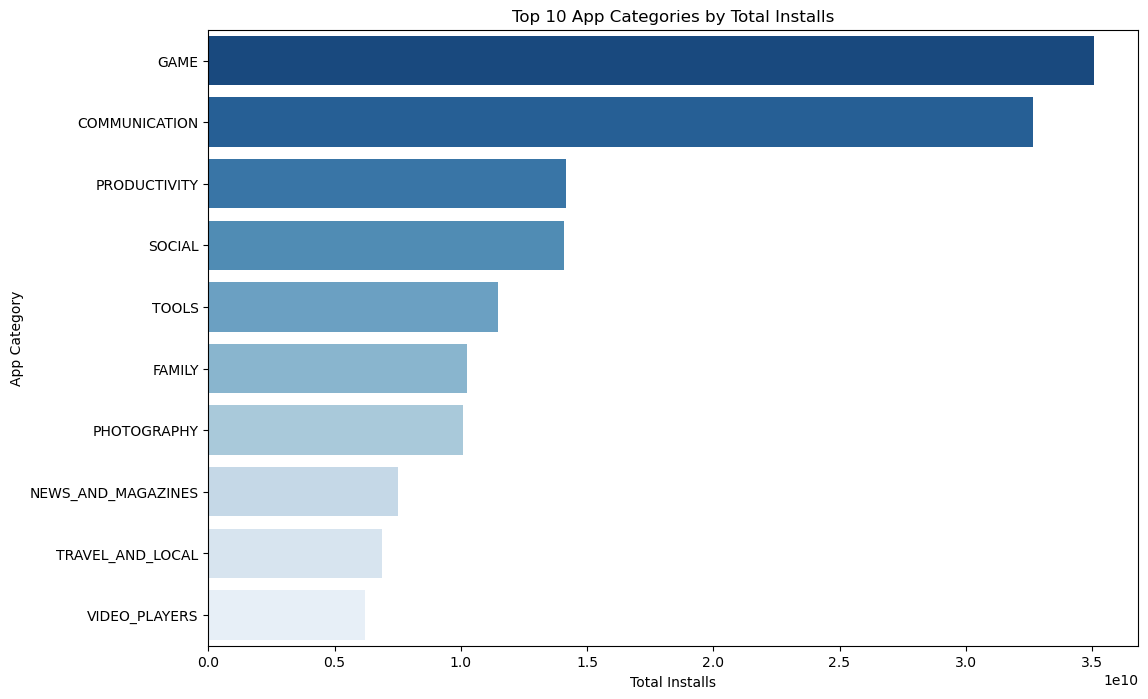

In [7]:
category_installs = df_copy.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=category_installs.values, y=category_installs.index, palette='Blues_r')
plt.title('Top 10 App Categories by Total Installs')
plt.xlabel('Total Installs')
plt.ylabel('App Category')
plt.show()


#### App Categories vs. Average Ratings:
- Explore the app categories with the highest average ratings.

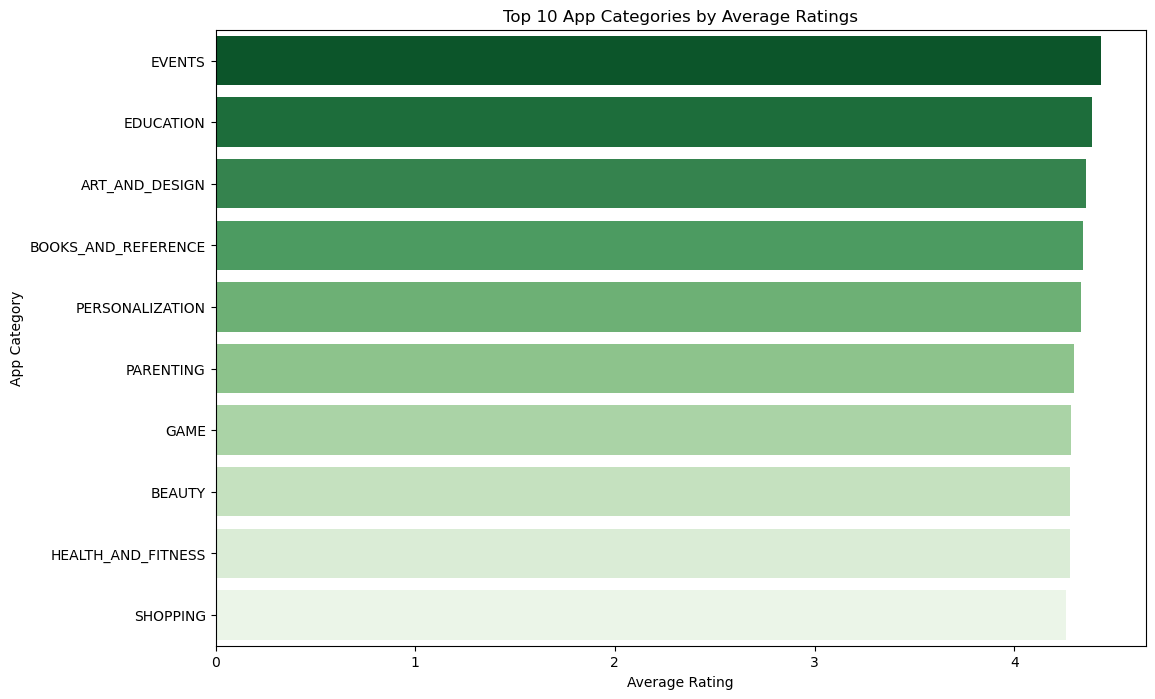

In [8]:
category_avg_ratings = df_copy.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=category_avg_ratings.values, y=category_avg_ratings.index, palette='Greens_r')
plt.title('Top 10 App Categories by Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('App Category')
plt.show()


#### Number of Apps Released per Category:
- Identify app categories with a high number of apps released.

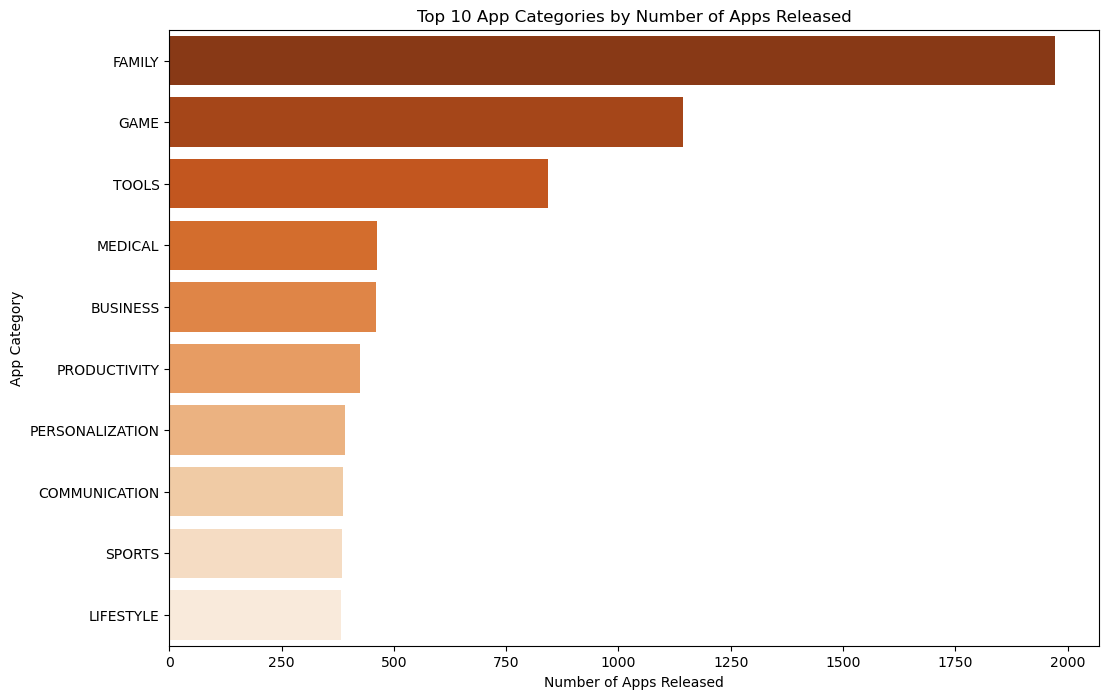

In [9]:
category_app_counts = df_copy['Category'].value_counts().head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=category_app_counts.values, y=category_app_counts.index, palette='Oranges_r')
plt.title('Top 10 App Categories by Number of Apps Released')
plt.xlabel('Number of Apps Released')
plt.ylabel('App Category')
plt.show()


#### Price vs. Average Ratings:
- Explore if there's a correlation between the pricing of apps and their average ratings.

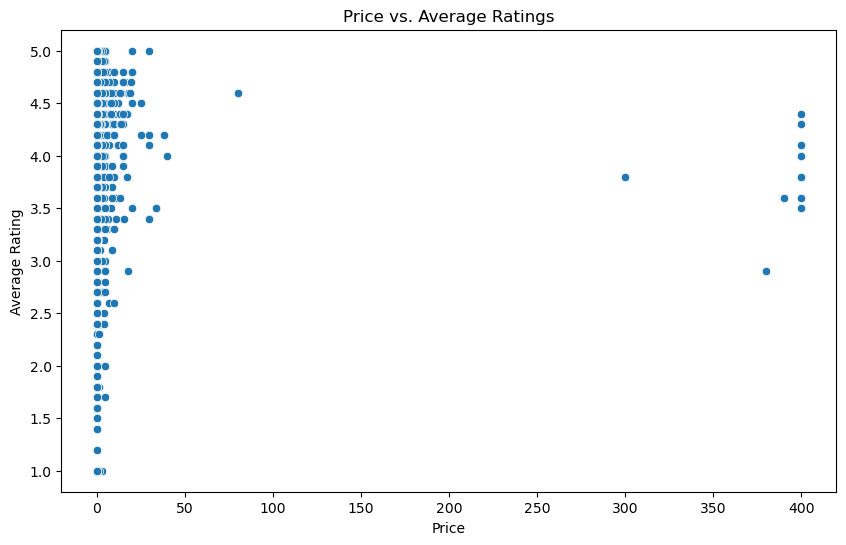

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Rating', data=df_copy)
plt.title('Price vs. Average Ratings')
plt.xlabel('Price')
plt.ylabel('Average Rating')
plt.show()


In [11]:
pip install textblob


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 13.2 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 39.5 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 774.0/774.0 kB 45.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [12]:
from textblob import TextBlob


#### User Reviews Sentiment Analysis:
- Analyze the overall sentiment of user reviews across all apps.

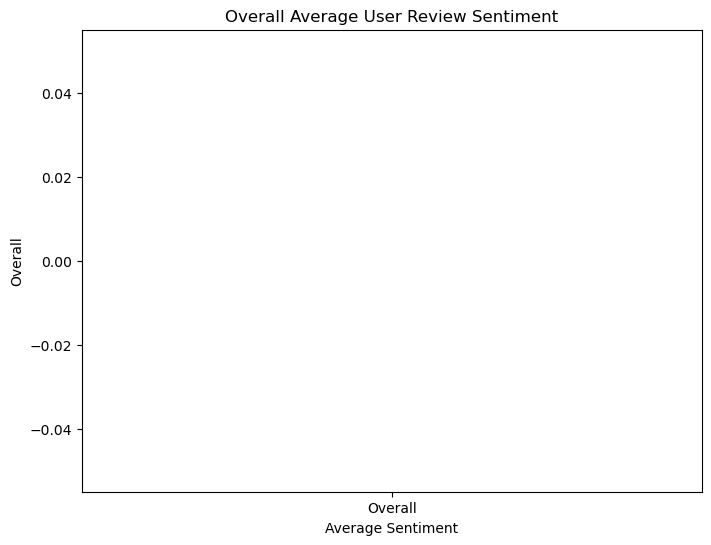

In [13]:
df_copy['Review_Sentiment'] = df_copy['Reviews'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
overall_avg_sentiment = df_copy['Review_Sentiment'].mean()
plt.figure(figsize=(8, 6))
sns.barplot(x=['Overall'], y=[overall_avg_sentiment], palette='PuBu_r')
plt.title('Overall Average User Review Sentiment')
plt.xlabel('Average Sentiment')
plt.ylabel('Overall')
plt.show()



### Q17. A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to launch a new app. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

#### To identify the best time to launch a new app, you can analyze various temporal features in the Google Playstore dataset. Here are the key features to consider and corresponding data visualizations to present your findings:

##### Monthly Trends in App Releases:
- Analyze the number of app releases each month to identify if there are any seasonal trends.

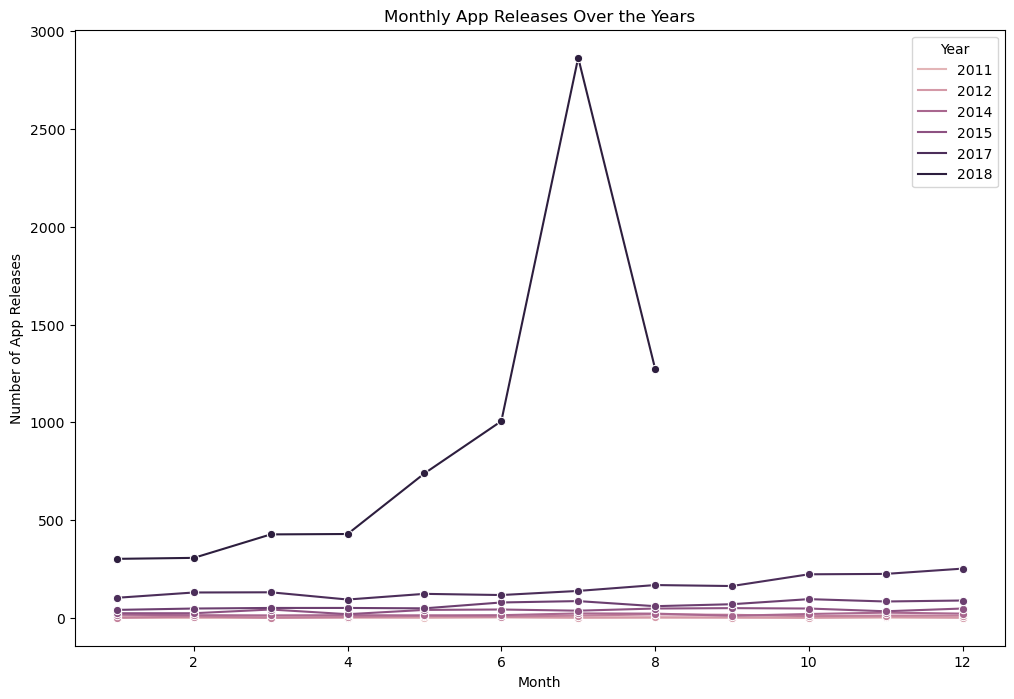

In [14]:
monthly_app_releases = df_copy.groupby(['Month', 'Year']).size().reset_index(name='Counts')
plt.figure(figsize=(12, 8))
sns.lineplot(x='Month', y='Counts', hue='Year', data=monthly_app_releases, marker='o')
plt.title('Monthly App Releases Over the Years')
plt.xlabel('Month')
plt.ylabel('Number of App Releases')
plt.legend(title='Year')
plt.show()


#### Monthly Trends in App Installs:
- Explore the number of app installations each month to identify peak periods.

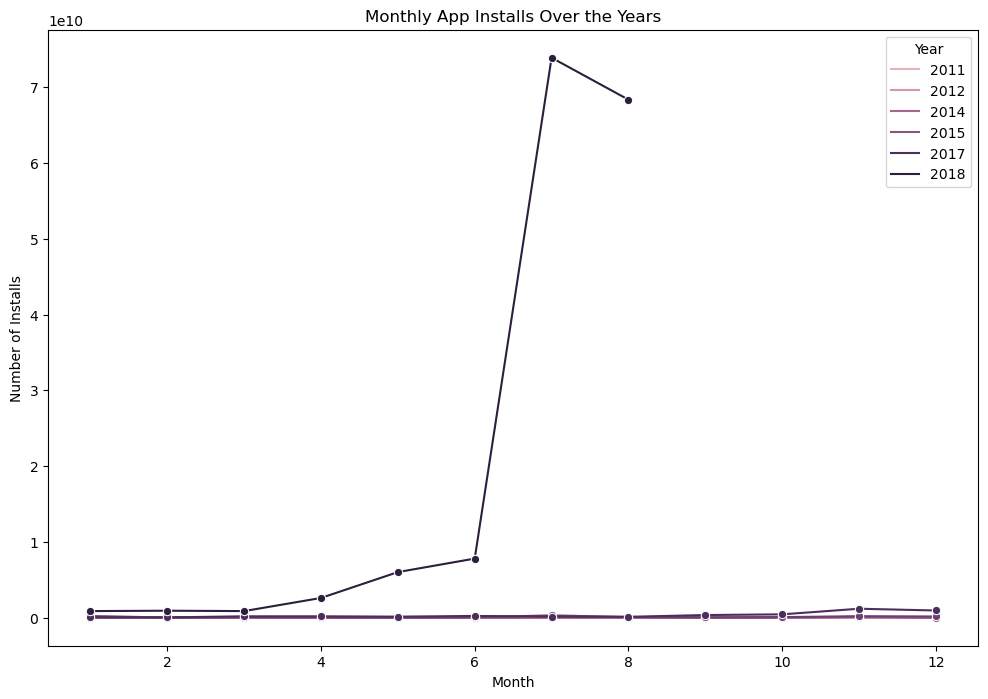

In [15]:
monthly_installs = df_copy.groupby(['Month', 'Year'])['Installs'].sum().reset_index()
plt.figure(figsize=(12, 8))
sns.lineplot(x='Month', y='Installs', hue='Year', data=monthly_installs, marker='o')
plt.title('Monthly App Installs Over the Years')
plt.xlabel('Month')
plt.ylabel('Number of Installs')
plt.legend(title='Year')
plt.show()


#### Day of the Week Trends:
- Analyze if there are specific days of the week when app releases or installs are higher.

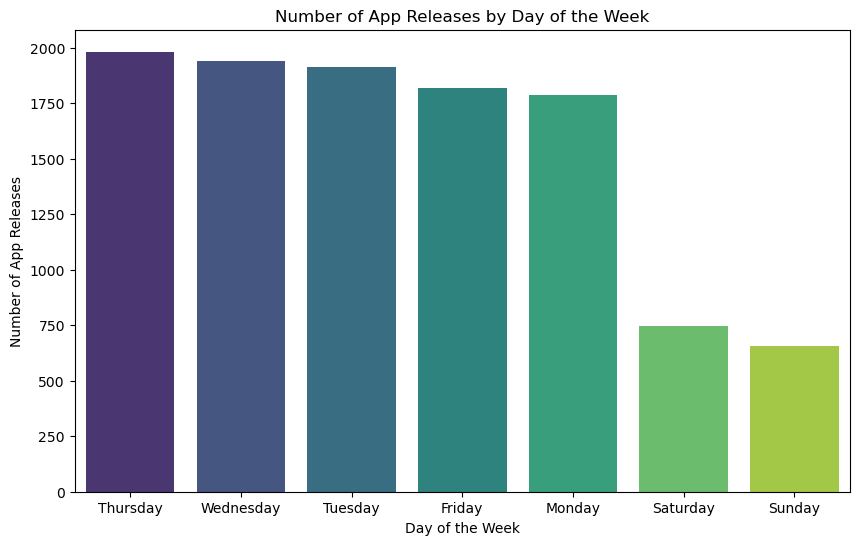

In [16]:
day_of_week_releases = df_copy.groupby(df_copy['Last Updated'].dt.day_name())['App'].count().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=day_of_week_releases.index, y=day_of_week_releases.values, palette='viridis')
plt.title('Number of App Releases by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of App Releases')
plt.show()


#### Day of the Week Trends in Installs:
- Explore if there are specific days of the week when app installs are higher.

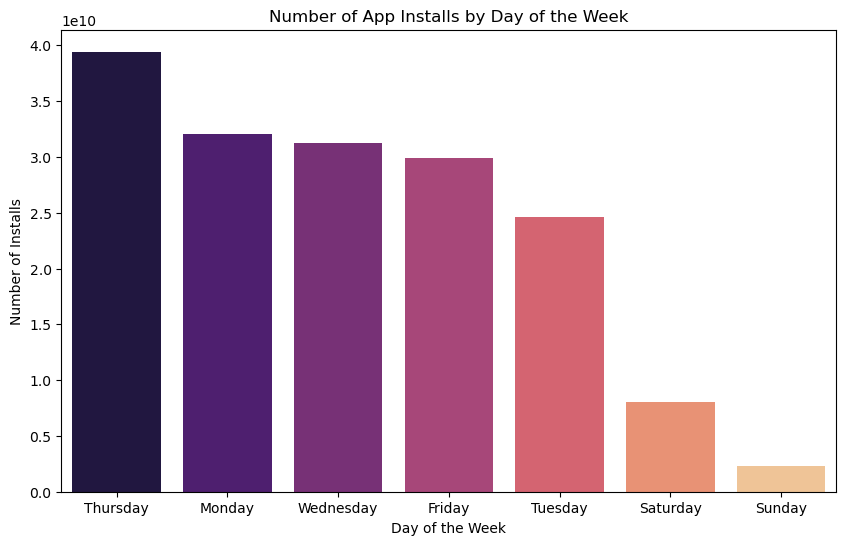

In [17]:
day_of_week_installs = df_copy.groupby(df_copy['Last Updated'].dt.day_name())['Installs'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=day_of_week_installs.index, y=day_of_week_installs.values, palette='magma')
plt.title('Number of App Installs by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Installs')
plt.show()


#### Yearly Trends:
- Analyze the yearly trends in app releases and installs.

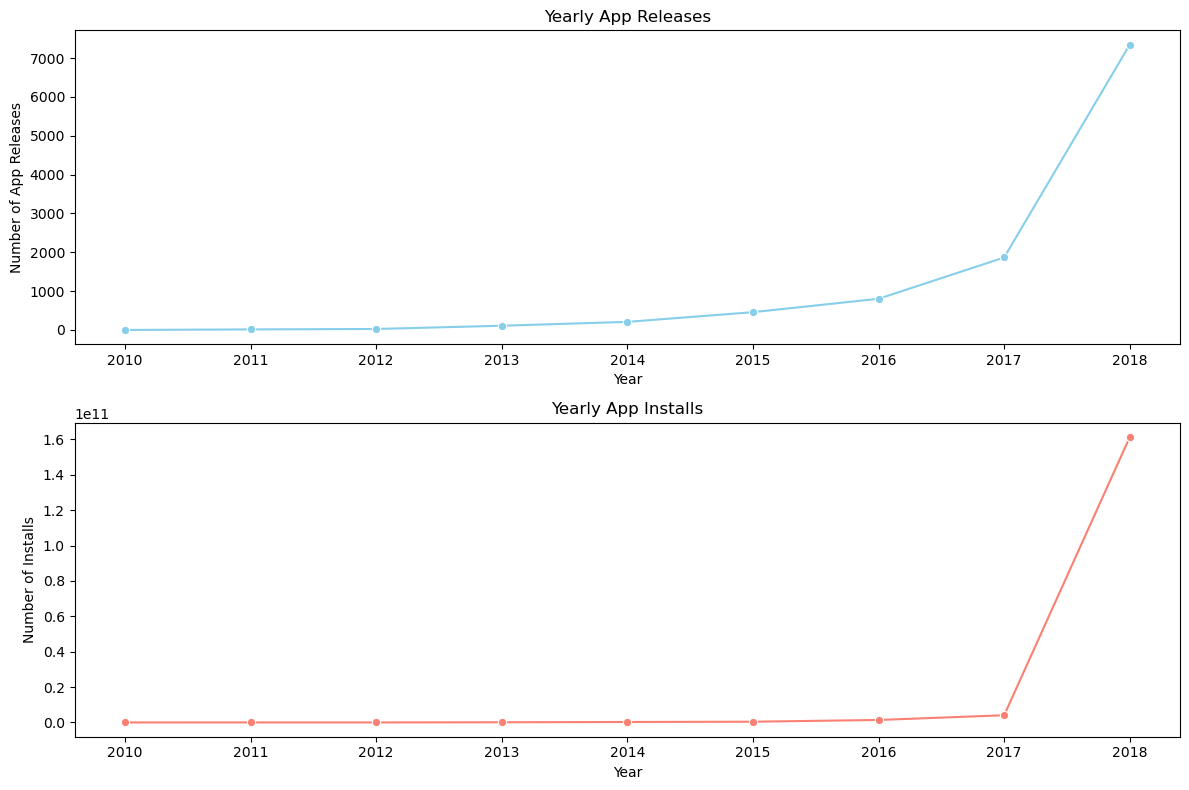

In [18]:
yearly_releases = df_copy.groupby('Year')['App'].count()
yearly_installs = df_copy.groupby('Year')['Installs'].sum()
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
sns.lineplot(x=yearly_releases.index, y=yearly_releases.values, marker='o', color='skyblue')
plt.title('Yearly App Releases')
plt.xlabel('Year')
plt.ylabel('Number of App Releases')

plt.subplot(2, 1, 2)
sns.lineplot(x=yearly_installs.index, y=yearly_installs.values, marker='o', color='salmon')
plt.title('Yearly App Installs')
plt.xlabel('Year')
plt.ylabel('Number of Installs')

plt.tight_layout()
plt.show()


##### These visualizations can provide insights into the temporal patterns of app releases and installations in the Google Playstore dataset. The marketing research firm can use these findings to make informed decisions about the best time to launch a new app. Adjustments can be made based on specific goals or additional insights required by the firm.